# construct SOAP descriptor
we are using SOAP descriptor to charaterize the local geometry beyond conventional Cartesian coordinates and is invariant to rotations, translations, permutations, etc. To make SOAP descriptor applicable for system with many element species, we here do not distinguish different elements in the local environment since this information is already encoded in some of the other features in the WWL-GPR model.

## input a structure (or a valide ASE atoms object)
for example we create an alloy Pt3Rh fcc(211) surfaces

In [1]:
from ase import Atoms, visualize
from ase.build import surface
from ase.visualize.plot import plot_atoms
a = 4.0
Pt3Rh = Atoms('Pt3Rh',
              scaled_positions=[(0, 0, 0),
                                (0.5, 0.5, 0),
                                (0.5, 0, 0.5),
                                (0, 0.5, 0.5)],
              cell=[a, a, a],
              pbc=True)
s3 = surface(Pt3Rh, (2, 1, 1), 9)
s3.center(vacuum=10, axis=2)

visualize its structure

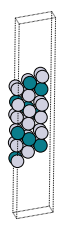

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.axis('off')
plot_atoms(s3,radii=0.8, rotation=("-75x, 45y, 10z"))

## set all elements to be uniform 
where you could specify them to be "C" or whatever element. Different choice dose not change the results

In [3]:
s3.symbols = ["C"]*len(s3)

## create SOAP descriptor by adjusting some parameters 
for example we use rcut = 3; nmax = 4; lmax = 6, sigma=0.35. Benefit from graph-based message passing architecture, we don't have to consider too large cutoff. You may want to understand in-depth each of hyperparameters and optimize them for your own system. see: https://singroup.github.io/dscribe/latest/tutorials/descriptors/soap.html

In [4]:
from dscribe.descriptors import SOAP
rcut = 3; nmax = 4; lmax = 6
species = (['C'])
periodic_soap = SOAP( 
    species=species, 
    rcut=rcut,
    nmax=nmax, 
    lmax=lmax, 
    sigma=0.35,
    periodic=True, 
    sparse=False 
)       

In [5]:
soap_s3 = periodic_soap.create(s3)

In [6]:
print(soap_s3, "number of atoms:", len(soap_s3), "length of descriptor:", len(soap_s3[0]))

[[ 0.46272433  0.7288511   0.3429046  ...  0.01176504 -0.00948084
   0.00764012]
 [ 0.45351586  0.73689     0.30942783 ...  0.02005363 -0.01615999
   0.01302235]
 [ 0.45351586  0.73689     0.30942783 ...  0.02005363 -0.01615999
   0.01302235]
 ...
 [ 0.46272433  0.7288511   0.3429046  ...  0.01176504 -0.00948084
   0.00764012]
 [ 0.46272433  0.7288511   0.3429046  ...  0.01176504 -0.00948084
   0.00764012]
 [ 0.45351586  0.73689     0.30942783 ...  0.02005363 -0.01615999
   0.01302235]] number of atoms: 36 length of descriptor: 70


Now you get a soap descriptor to represent the geometry of this structure without distinguishing element. For each atom in the structure you get a soap vector in order of indices of radial basis functions and angular degree of the spherical harmonics, and its length is equal to 70 under current setting